<div style="text-align: center;">
    <h2>K-Drama Recommender System</h2>
</div>

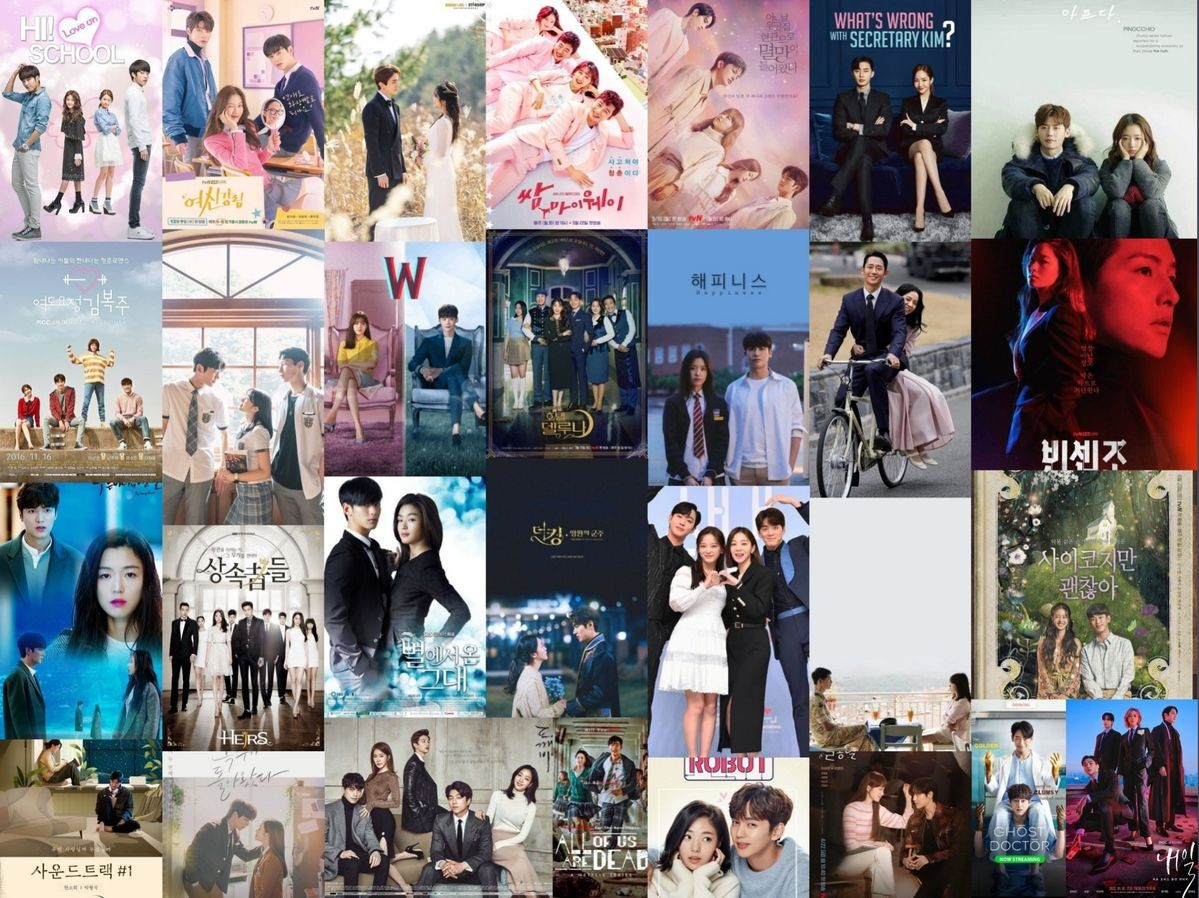

In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  
sns.set_style('white')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loadind the data
kdrama_df=pd.read_csv("C:/Users/Kankana Ghosh/Desktop/Dataset/kdrama.csv")
kdrama_df.head()

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5


In [3]:
kdrama_df.columns

Index(['Name', 'Aired Date', 'Year of release', 'Original Network', 'Aired On',
       'Number of Episodes', 'Duration', 'Content Rating', 'Rating',
       'Synopsis', 'Genre', 'Tags', 'Director', 'Screenwriter', 'Cast',
       'Production companies', 'Rank'],
      dtype='object')

In [4]:
row,column=kdrama_df.shape
print(f"The dataset has {row} rows and {column} columns")

The dataset has 250 rows and 17 columns


In [36]:
kdrama_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 249
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  242 non-null    object 
 1   Aired Date            242 non-null    object 
 2   Year of release       242 non-null    int64  
 3   Original Network      242 non-null    object 
 4   Aired On              242 non-null    object 
 5   Number of Episodes    242 non-null    int64  
 6   Duration              242 non-null    object 
 7   Content Rating        242 non-null    object 
 8   Rating                242 non-null    float64
 9   Synopsis              242 non-null    object 
 10  Genre                 242 non-null    object 
 11  Tags                  242 non-null    object 
 12  Director              242 non-null    object 
 13  Screenwriter          242 non-null    object 
 14  Cast                  242 non-null    object 
 15  Production companies  2

### Data Cleaning

In [5]:
(kdrama_df.isnull()).sum()

Name                    0
Aired Date              0
Year of release         0
Original Network        0
Aired On                0
Number of Episodes      0
Duration                0
Content Rating          5
Rating                  0
Synopsis                0
Genre                   0
Tags                    0
Director                1
Screenwriter            1
Cast                    0
Production companies    2
Rank                    0
dtype: int64

In [6]:
# Drop rows with missing values only in specific columns
columns_to_check = ['Content Rating', 'Director', 'Screenwriter', 'Production companies']
kdrama_df = kdrama_df.dropna(subset=columns_to_check)

row,column=kdrama_df.shape
print(f"After removing the missing entities the cleaned dataset contains {row} rows and {column} columns.")

After removing the missing entities the cleaned dataset contains 242 rows and 17 columns.


### Data Analysis

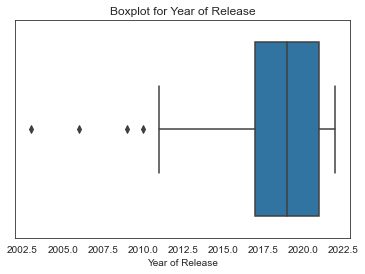

In [45]:
sns.boxplot(kdrama_df['Year of release'])
plt.title('Boxplot for Year of Release')
plt.xlabel('Year of Release')
plt.show()

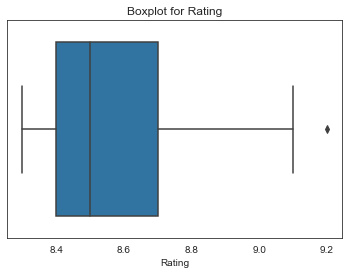

In [46]:
sns.boxplot(kdrama_df['Rating'])
plt.title('Boxplot for Rating')
plt.xlabel('Rating')
plt.show()

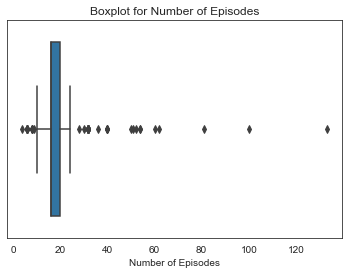

In [47]:
sns.boxplot(kdrama_df['Number of Episodes'])
plt.title('Boxplot for Number of Episodes')
plt.xlabel('Number of Episodes')
plt.show()

The boxplot for Year of Release, Number of Episodes and Ratings have outliers present in them.

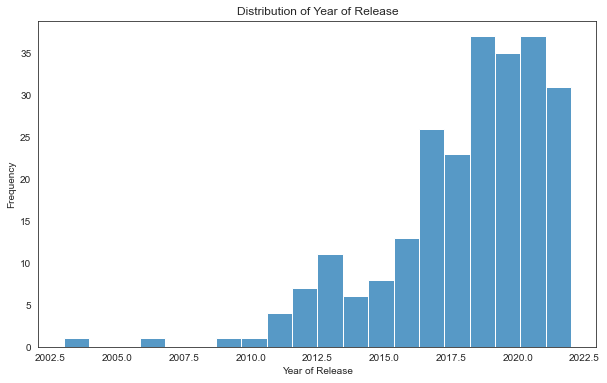

In [7]:
# histogram of the 'Year of release' column
plt.figure(figsize=(10, 6))
sns.histplot(data=kdrama_df, x='Year of release', bins=20)
plt.title('Distribution of Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Frequency')
plt.show()

In [27]:
kdrama_df.groupby('Year of release')['Name'].count()

Year of release
2003     1
2006     1
2009     1
2010     1
2011     4
2012     7
2013    11
2014     6
2015     8
2016    13
2017    26
2018    23
2019    37
2020    35
2021    37
2022    31
Name: Name, dtype: int64

From the histogram of ‘Year of Release’ it is seen that the distribution is negatively skewed which is obvious. The production of kdrama has started increasing from the year 2017.

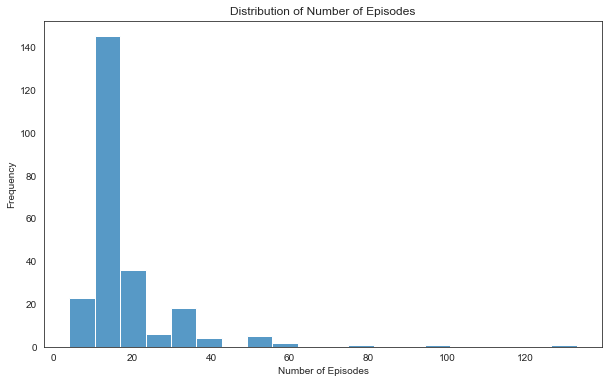

In [39]:
# histogram of the 'Number of Episodes' column
plt.figure(figsize=(10, 6))
sns.histplot(data=kdrama_df, x='Number of Episodes', bins=20)
plt.title('Distribution of Number of Episodes')
plt.xlabel('Number of Episodes')
plt.ylabel('Frequency')
plt.show()

In [40]:
kdrama_df.groupby('Number of Episodes')['Name'].count()

Number of Episodes
4        1
6        9
8        5
9        1
10       7
11       2
12      24
13       2
14       4
16     113
17       2
18       3
20      29
21       2
24       5
28       1
30       1
32      16
36       1
40       4
50       1
51       1
52       1
54       2
60       1
62       1
81       1
100      1
133      1
Name: Name, dtype: int64

The histogram for Number of Episodes also exhibits a positively skewed distribution with highest frequency of series having 16 number of episodes .

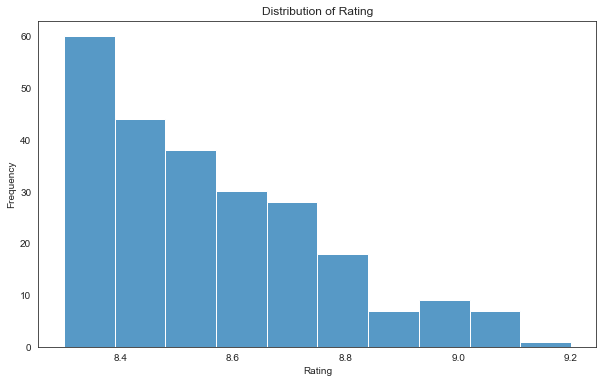

In [30]:
# histogram of the 'Rating' column
plt.figure(figsize=(10, 6))
sns.histplot(data=kdrama_df, x='Rating', bins=10)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [48]:
kdrama_df.groupby('Rating')['Name'].count()

Rating
8.3    60
8.4    44
8.5    38
8.6    30
8.7    28
8.8    18
8.9     7
9.0     9
9.1     7
9.2     1
Name: Name, dtype: int64

From the histogram of Rating given to series we see that it is positively skewed i.e., only few series gets higher rating and it's evident. Maximum series have rating 8.3. 

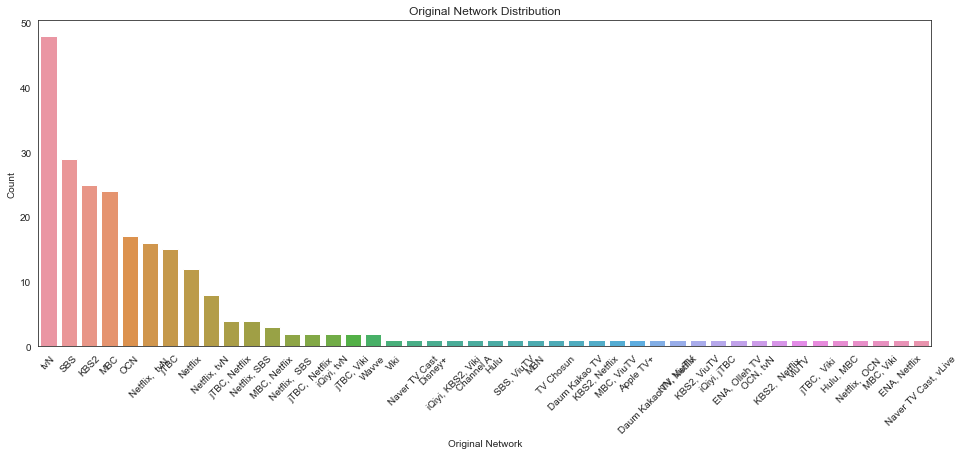

In [9]:
# Countplot for 'Network'
plt.figure(figsize=(16, 6))
sns.countplot(data=kdrama_df, x='Original Network', order=kdrama_df['Original Network'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Original Network Distribution')
plt.xlabel('Original Network')
plt.ylabel('Count')
plt.show()

The barplot of Original Network reveals that tvN has highest frequency for series release.

In [10]:
# Group by 'Original Network' and count occurrences of each network
network_counts = kdrama_df['Original Network'].value_counts()
network_counts_df = pd.DataFrame({'Original Network': network_counts.index, 'Count': network_counts.values})
print(network_counts_df)

          Original Network  Count
0                      tvN     48
1                      SBS     29
2                     KBS2     25
3                      MBC     24
4                      OCN     17
5           Netflix,  tvN      16
6                     jTBC     15
7                  Netflix     12
8             Netflix, tvN      8
9            jTBC, Netflix      4
10            Netflix, SBS      4
11            MBC, Netflix      3
12          Netflix,  SBS       2
13         jTBC,  Netflix       2
14              iQiyi, tvN      2
15              jTBC, Viki      2
16                   Wavve      2
17                    Viki      1
18           Naver TV Cast      1
19                 Disney+      1
20       iQiyi, KBS2, Viki      1
21               Channel A      1
22                    Hulu      1
23              SBS, ViuTV      1
24                     MBN      1
25               TV Chosun      1
26           Daum Kakao TV      1
27           KBS2, Netflix      1
28            

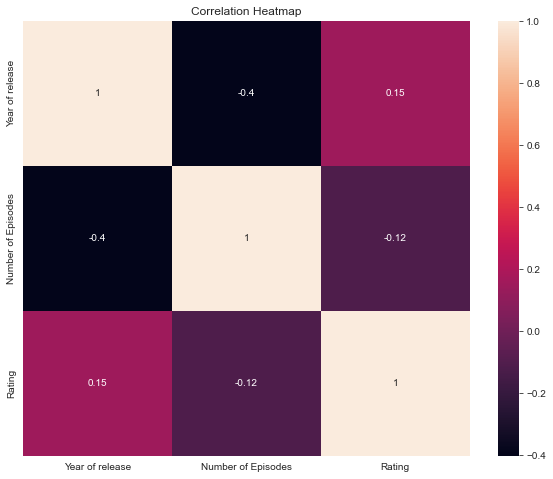

In [11]:
# Calculate correlation matrix
correlation_matrix = kdrama_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows a moderate negative correlation between Number  of Episodes and Year of Release which means that older series had more number of episodes.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine relevant text columns into a single text column
text_columns = ['Synopsis', 'Genre', 'Tags', 'Director', 'Screenwriter', 'Cast', 'Production companies']
kdrama_df['text_data'] = kdrama_df[text_columns].fillna('').agg(' '.join, axis=1)

# Use TF-IDF vectorization to convert text data into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
text_features = vectorizer.fit_transform(kdrama_df['text_data'])

In [50]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix based on the text features
similarity_matrix = linear_kernel(text_features, text_features)

In [14]:
drama_name=input("Enter Drama Name:")
num_recommendations=int(input("Enter the number of recommendations that you want:"))
def get_kdrama_recommendations(drama_name, num_recommendations):
    # Get the index of the drama in the dataset
    drama_index = kdrama_df[kdrama_df['Name'] == drama_name].index[0]

    # Get the similarity scores for the drama with other dramas
    similarity_scores = list(enumerate(similarity_matrix[drama_index]))

    # Sort dramas based on similarity scores in descending order
    sorted_dramas = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Exclude the drama itself from the recommendations
    sorted_dramas = [drama for drama in sorted_dramas if drama[0] != drama_index]

    # Get the indices of the recommended dramas
    recommended_indices = [drama[0] for drama in sorted_dramas[:num_recommendations]]

    # Retrieve the drama names from the dataset
    recommended_dramas = kdrama_df.iloc[recommended_indices]['Name'].tolist()

    return recommended_dramas



Enter Drama Name:Hospital Playlist
Enter the number of recommendations that you want:5


In [15]:
# Replace 'drama_name' with the name of the drama you want to get recommendations for
recommended_dramas = get_kdrama_recommendations(drama_name, num_recommendations)

# Print the recommended drama names
recommended_dramas=pd.DataFrame(recommended_dramas)
recommended_dramas.columns=['Suggested Names']
#This content-based KDrama recommender will recommend dramas similar to the input drama based on their textual attributes like synopsis, genre, tags, director, cast, etc. You can adjust the num_recommendations parameter to get more or fewer recommendations. For more advanced recommendation systems, you can also combine content-based filtering with collaborative filtering or other advanced techniques.
recommended_dramas

,Suggested Names
0,Hospital Playlist 2
1,Dr. Romantic 2
2,Reply 1997
3,Doctor Prisoner
4,Reply 1988


While this algorithm has done a decent job of finding series with similar features of the series given by the user but the quality of recommendations is not that great. Content-based filtering tends to recommend series that are closely related to a user's past interactions. This could result in over-specialization, where users receive recommendations that are too narrow in scope and don't expose them to a variety of content.